In [1]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Prepare Database information

db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]
tgts_all = pd.read_csv('/Users/melis/Documents/GitHub/LR_project/processed_data/hot-encoded-diseases_0.400000.csv')

tgts_all['gene']=tgts_all['genes']
tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])
tgts

,AD,ALS,AnorexiaNervosa,BipolarDisorder,BrainAneurysm,EssentialTremor,FrontotemporalDementia,MajorDepressiveDisorder,MigraineDisorder,MS,NeuroticDisorder,OCD,PartialEpilepsy,PD,RestlessLeg,Schizophrenia,TouretteSyndrome,UnipolarDepression
gene,,,,,,,,,,,,,,,,,,
ABCA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCA13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ABCA7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ACE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZPLD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZSCAN2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# Find genes that are LRs
source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)
tgts.drop('Empty', axis = 1, inplace = True)

#Keep LRIs where at least one interactor is associated with disease
LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]
unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

#Make an empty pandas dataframe to populate with all Ls or Rs linked to interactions disturbed in disease
risk_connectors = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(tgts.columns))), columns=list(tgts.columns), index=unique_genes)


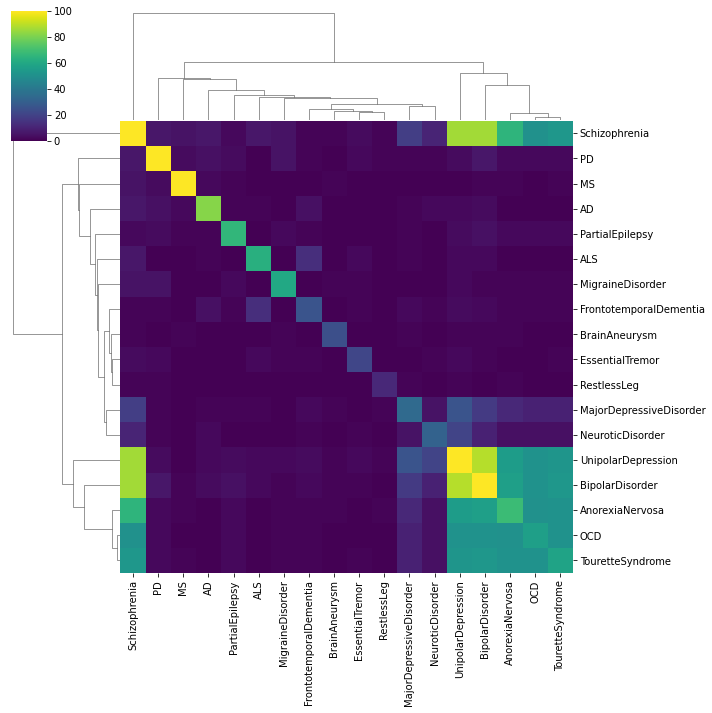

In [15]:
tgts.loc[sum['gene']].T.dot(tgts.loc[sum['gene']])

g = sns.clustermap(tgts.loc[sum['gene']].T.dot(tgts.loc[sum['gene']]), vmax = 100, cmap = 'viridis')
#x0, _y0, _w, _h = g.cbar_pos
#box = g.ax_row_colors.get_position()
#g.ax_cbar.set_position([x0, 0.02, g.ax_row_dendrogram.get_position().width/6, 0.1])
#g.ax_cbar.set_title('genetic risk')
#plt.savefig('plots/02-clustering_with_LR_partners/clustermap_overlaps_LR_network.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('plots/02-clustering_with_LR_partners/clustermap_overlaps_LR_network.pdf', bbox_inches = 'tight')
plt.show()

In [5]:
#For each disease, find risk LRIs
# Consider a gene risk for a diseases if it is (1) a risk gene for the disease OR (2) directly interacts with a risk gene

for n in range(0,len(tgts.columns)):
    disease_tgts = tgts[tgts.iloc[:,n]>0.0]
    disease_source, disease_percSrc, disease_targets, disease_percTgt, disease_sum = ml.lr.find_hits(disease_tgts, db) 
    disease_LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(disease_sum.gene))) | (db['genesymbol_intercell_target'].isin(list(disease_sum.gene)))]
    disease_LRs_unique = pd.concat([disease_LRs['genesymbol_intercell_source'], disease_LRs['genesymbol_intercell_target']]).unique()
    for m in range(0,len(disease_LRs_unique)):
        #print(disease_LRs_unique[m])
        #print(risk_connectors.loc[disease_LRs_unique[m]])
        risk_connectors.iloc[risk_connectors.index.get_loc(disease_LRs_unique[m]), n] = 1.0
    

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


IL6R
AD                         0.0
ALS                        0.0
AnorexiaNervosa            0.0
BipolarDisorder            0.0
BrainAneurysm              0.0
EssentialTremor            0.0
FrontotemporalDementia     0.0
MajorDepressiveDisorder    0.0
MigraineDisorder           0.0
MS                         0.0
NeuroticDisorder           0.0
OCD                        0.0
PartialEpilepsy            0.0
PD                         0.0
RestlessLeg                0.0
Schizophrenia              0.0
TouretteSyndrome           0.0
UnipolarDepression         0.0
Name: IL6R, dtype: float64
EPOR
AD                         0.0
ALS                        0.0
AnorexiaNervosa            0.0
BipolarDisorder            0.0
BrainAneurysm              0.0
EssentialTremor            0.0
FrontotemporalDementia     0.0
MajorDepressiveDisorder    0.0
MigraineDisorder           0.0
MS                         0.0
NeuroticDisorder           0.0
OCD                        0.0
PartialEpilepsy            0.0
PD

In [ ]:
lut = {'AD' : 'purple',
 'ALS' : 'purple',
 'AnorexiaNervosa' : 'deepskyblue',
 'BipolarDisorder' : 'deepskyblue',
 'BrainAneurysm' : 'orange',
 'EssentialTremor' : 'purple',
 'FrontotemporalDementia' : 'purple',
 'IntracranialHemorrhage' : 'orange',
 'LBD' : 'purple',
 'MajorDepressiveDisorder' : 'deepskyblue',
 'MigraineDisorder' : 'orange',
 'MigraineWithAura' : 'orange',
 'MS' : 'orange',
 'NarcolepsyCataplexy' : 'orange',
 'Narcolepsy' : 'orange',
 'NeuroticDisorder' : 'deepskyblue',
 'OCD' : 'deepskyblue',
 'PartialEpilepsy' : 'orange',
 'PD' : 'purple',
 'ProgressiveSupranuclearPalsy' : 'purple',
 'RestlessLeg' : 'orange',
 'Schizophrenia' : 'deepskyblue',
 'TouretteSyndrome' : 'deepskyblue',
 'UnipolarDepression' : 'deepskyblue'}
row_colors = risk_connectors.columns.unique().map(lut)
sns.set(font_scale = 1.1)

# By multiplying the risk_connector matrix with itself we get an adjacency matrix counting the genes vulnerable across diseases due to risk or interactions with genes at risk
g = sns.clustermap(risk_connectors.T.dot(risk_connectors), vmax = 200, row_colors=row_colors, col_colors = ax_row_colors, cmap = 'viridis')
x0, _y0, _w, _h = g.cbar_pos
box = g.ax_row_colors.get_position()
g.ax_cbar.set_position([x0, 0.02, g.ax_row_dendrogram.get_position().width/6, 0.1])
g.ax_cbar.set_title('genetic risk')
plt.savefig('plots/02-clustering_with_LR_partners/clustermap_overlaps_LR_network.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('plots/02-clustering_with_LR_partners/clustermap_overlaps_LR_network.pdf', bbox_inches = 'tight')
plt.show()

risk_connectors.T.dot(risk_connectors).to_csv('overlaps_risk_LRIs.csv')